# Exploring Dandiset 001433: Breathing rhythm and place dataset

**Note:** This notebook was generated by an AI assistant and has not been fully verified. Please use care when interpreting code or results.

## Overview

This notebook provides an introduction and basic analysis for the dataset ["Breathing rhythm and place dataset"](https://dandiarchive.org/dandiset/001433/0.250507.2356), Dandiset 001433, Version 0.250507.2356. The dataset contains behavioral and electrophysiological data from recordings of sniffing, video, and olfactory bulb (OB) electrophysiology in freely behaving mice with no stimulus, reward, or task.

**Citation:**  
Breathing rhythm and place dataset (2025). (Version 0.250507.2356) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001433/0.250507.2356

- **Contributors:** National Institutes of Health (NIH), Smear, Matt
- **Created:** 2025-05-05
- **License:** CC-BY-4.0  
- **Techniques:** surgical, multi-electrode extracellular electrophysiology recording

See the [Dandiset landing page](https://dandiarchive.org/dandiset/001433/0.250507.2356) for more information.

## What this notebook covers

- How to access Dandiset 001433 using the DANDI API.
- How to enumerate files/assets in the Dandiset.
- How to load example NWB file(s) and explore their structure.
- How to extract and visualize LFP (local field potential), sniffing, and behavioral features.
- How to interpret and contextualize the data for further analysis.

**Note:** This notebook is not comprehensive and is meant to provide an approachable starting point for exploration.  
Code cells are commented to explain each step.

## Required Python packages

This notebook assumes the following packages are already installed:
- dandi
- pynwb
- h5py
- remfile
- pandas
- numpy
- matplotlib
- seaborn

Please ensure these are installed in your environment before running the notebook.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001433", "0.250507.2356")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url'] if 'url' in metadata else 'https://dandiarchive.org/dandiset/001433/0.250507.2356'}")

# List first 5 assets in the Dandiset
assets = dandiset.get_assets()
assets_list = list(islice(assets, 5))
print("\nFirst 5 assets:")
for asset in assets_list:
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Breathing rhythm and place dataset
Dandiset URL: https://dandiarchive.org/dandiset/001433/0.250507.2356

First 5 assets:
- sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb (ID: 63d19f03-2a35-48bd-a54f-9ab98ceb7be2)
- sub-4122/sub-4122_ses-20250507T152930_ecephys.nwb (ID: cce2f86c-2440-4358-8298-75cb2faa83f1)
- sub-4122/sub-4122_ses-20250507T152933_ecephys.nwb (ID: 154a5db2-9bad-48b9-bbe4-13376c315cbe)
- sub-4127/sub-4127_ses-20250507T152941_ecephys.nwb (ID: 8a2c176c-846d-432c-9c7b-cfd0cefa40cb)
- sub-4127/sub-4127_ses-20250507T152953_ecephys.nwb (ID: ba3b58b3-38ff-49d4-bc73-2105c87ecf49)


## Loading an example NWB file

We will now load a representative NWB file from this Dandiset to demonstrate how to access and analyze electrophysiology and behavioral data.  
**File loaded:** `sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb`

- **Asset ID:** 63d19f03-2a35-48bd-a54f-9ab98ceb7be2
- **Direct download URL:**  
  https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/

You can also explore this NWB file via [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/&dandisetId=001433&dandisetVersion=draft) for interactive visualization.

In [2]:
import pynwb
import h5py
import remfile

# Open the remote NWB file using remfile/File + h5py + PyNWB
url = "https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experimenter: {nwb.experimenter}")

Session description: LFP and sniff recording
Session start time: 2025-05-07 15:29:27.359523-07:00
Experimenter: ('Rafilson, Sidney',)


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Summary of NWB file contents

```
File/session identifier:      4122_4
Session description:         LFP and sniff recording
Session start time:          2025-05-07T15:29:27.359523-07:00
Experimenter:                Rafilson, Sidney
Lab/Institution:             Smear lab, University of Oregon

Main contents:
├─ Acquisition:
│   ├─ LFP (ElectricalSeries): Local field potential, shape (1969184, 16)
│   └─ SniffSignal (TimeSeries): Raw sniff thermistor, shape (1969184,)
├─ Processing/behavior:
│   ├─ exhalation_time (TimeSeries): event times, shape (10030,)
│   └─ inhalation_time (TimeSeries): event times, shape (10030,)
├─ Electrodes: metadata table, 16 electrodes (group, location, filtering, etc.)
├─ Devices: OpenEphys system
├─ Subject: Mouse (id: 4122, sex: M, species: Mus musculus, age: P90D)
└─ Keywords: olfactory bulb, LFP, sniffing, mouse, neuroscience
```

The NWB file contains synchronized recordings of LFP and sniffing signals, as well as extracted sniff event times.

### Enumerate NWB acquisition objects

It's helpful to see what acquisition data streams are available in the file.

In [3]:
print("Acquisition objects:")
for key in nwb.acquisition:
    print("-", key, ":", type(nwb.acquisition[key]))

Acquisition objects:
- LFP : <class 'pynwb.ecephys.ElectricalSeries'>
- SniffSignal : <class 'pynwb.base.TimeSeries'>


## Explore LFP data

The `LFP` ElectricalSeries contains local field potentials recorded from olfactory bulb electrodes at 1 kHz.  
Each of the 16 columns is a separate channel.

Let's load a short segment of LFP data (~2 seconds, 2000 samples) for the first 2 electrodes and plot it.

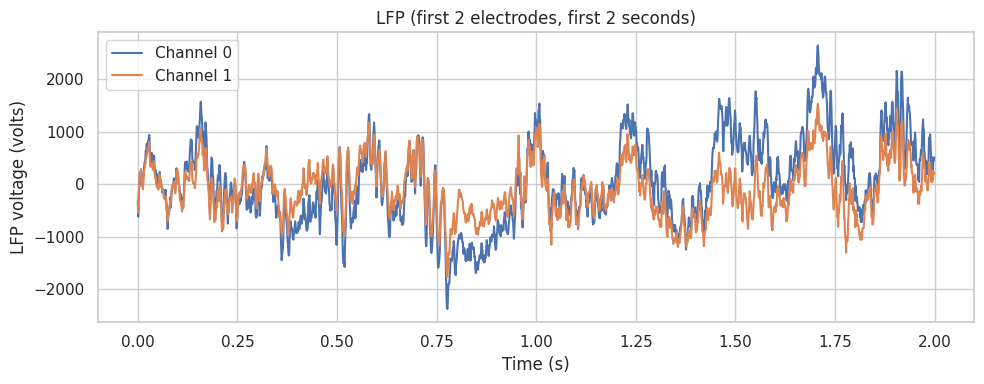

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

# Get LFP object
LFP = nwb.acquisition["LFP"]
lfp_rate = LFP.rate
duration_sec = 2
n_samples = int(duration_sec * lfp_rate)

# Stream a short segment to avoid large downloads
lfp_data = LFP.data[:n_samples, :2]  # shape (n_samples, channels)
time = np.arange(n_samples) / lfp_rate

plt.figure(figsize=(10, 4))
plt.plot(time, lfp_data[:, 0], label="Channel 0")
plt.plot(time, lfp_data[:, 1], label="Channel 1")
plt.xlabel('Time (s)')
plt.ylabel(f'LFP voltage ({LFP.unit})')
plt.title('LFP (first 2 electrodes, first 2 seconds)')
plt.legend()
plt.tight_layout()
plt.show()

## Explore Sniffing Signal

The `SniffSignal` time series records the raw sniff thermistor voltage at 1 kHz.  
Let's visualize a ~2-second segment of the sniffing signal.

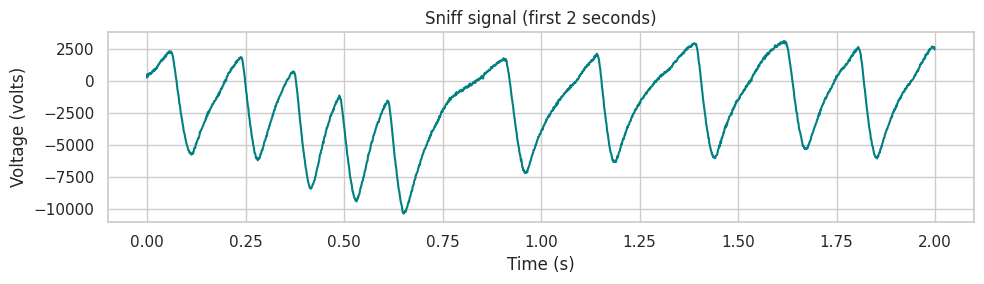

In [5]:
SniffSignal = nwb.acquisition["SniffSignal"]
sniff_data = SniffSignal.data[:n_samples]
sniff_time = np.arange(n_samples) / SniffSignal.rate

plt.figure(figsize=(10, 3))
plt.plot(sniff_time, sniff_data, color='teal')
plt.xlabel('Time (s)')
plt.ylabel(f'Voltage ({SniffSignal.unit})')
plt.title('Sniff signal (first 2 seconds)')
plt.tight_layout()
plt.show()

## Electrode information

The file includes 16 extracellular electrodes.  
Let's display their metadata as a table.

In [6]:
electrodes_table = nwb.electrodes.to_dataframe()
display(electrodes_table)

,location,group,group_name,filtering
id,,,,
0,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x131...,LFPGroup,none
1,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x131...,LFPGroup,none
2,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x131...,LFPGroup,none
3,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x131...,LFPGroup,none
4,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x131...,LFPGroup,none
5,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x131...,LFPGroup,none
6,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x131...,LFPGroup,none
7,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x131...,LFPGroup,none
8,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x131...,LFPGroup,none


## Explore behavioral features: inhalation and exhalation times

The processing module "behavior" contains extracted inhalation and exhalation event times (in seconds).  
We'll plot a histogram of all inhalation and exhalation intervals for this session.

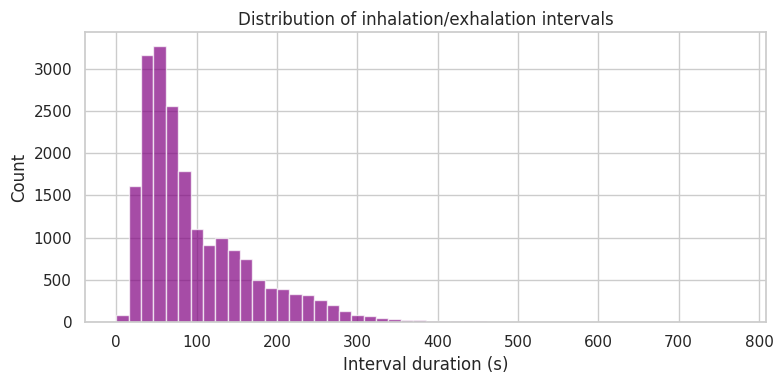

In [7]:
behavior = nwb.processing["behavior"]
inhalation_time = behavior.data_interfaces["inhalation_time"].timestamps[:]
exhalation_time = behavior.data_interfaces["exhalation_time"].timestamps[:]

inh_ex_intervals = np.diff(np.sort(np.concatenate([inhalation_time, exhalation_time])))

plt.figure(figsize=(8, 4))
plt.hist(inh_ex_intervals, bins=50, color='purple', alpha=0.7)
plt.xlabel('Interval duration (s)')
plt.ylabel('Count')
plt.title('Distribution of inhalation/exhalation intervals')
plt.tight_layout()
plt.show()

## Example: overlay LFP and sniff signal for the same segment

Let's visualize the LFP (channel 0) and sniff signal together for a short segment.
We'll z-score both signals for comparability.

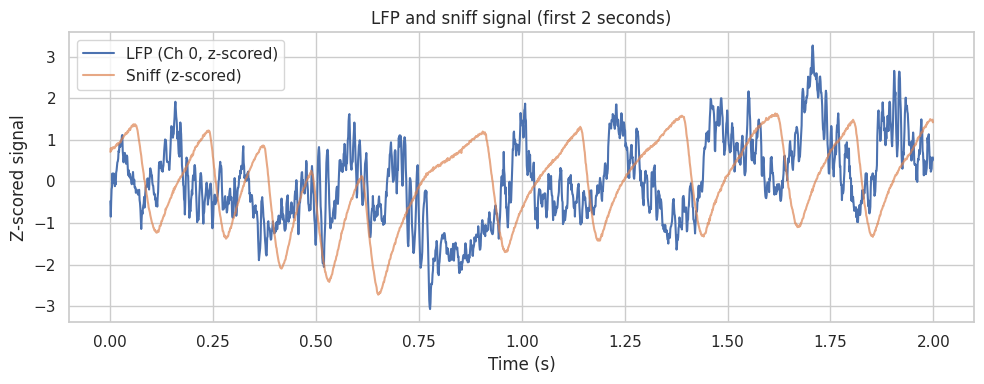

In [8]:
from scipy.stats import zscore

lfp_short = zscore(LFP.data[:n_samples, 0])
sniff_short = zscore(SniffSignal.data[:n_samples])

plt.figure(figsize=(10, 4))
plt.plot(time, lfp_short, label="LFP (Ch 0, z-scored)")
plt.plot(time, sniff_short, label="Sniff (z-scored)", alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Z-scored signal')
plt.title('LFP and sniff signal (first 2 seconds)')
plt.legend()
plt.tight_layout()
plt.show()

## Summary and future directions

In this notebook, we've:
- Connected to DANDI and listed Dandiset files/assets.
- Loaded an NWB file and explored LFP, sniffing, and behavioral events.
- Visualized example signals and intervals.

This is only a first step. For further analysis:
- Explore additional NWB files from the Dandiset.
- Analyze entire sessions or longer time windows.
- Investigate relationships between sniff cycles and LFP oscillations.
- Map electrode locations relative to behavior.
- Examine spectral properties of the signals.

**Always consult original documentation, and exercise caution when interpreting results from automated analysis.**